# Note: insur dataset is a dummie dataset and real dataset has been replace by insur.csv

In [1]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("insur.csv")

In [3]:
data.head(5).T

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_number,521585,342868,687698,227811,367455
policy_bind_date,17/10/2014,27/06/2006,06/09/2000,25/05/1990,06/06/2014
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


In [4]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [6]:
data.shape

(1000, 39)

In [7]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [8]:
#Deciding which catagorical variable should use
for col_name in data.columns:
    if data[col_name].dtypes == "object":
        unique_cat = len(data[col_name].unique())
        print("Feature ''{col_name}'' has {unique_cat} unique catagories".format(col_name=col_name, unique_cat=unique_cat))

Feature ''policy_bind_date'' has 951 unique catagories
Feature ''policy_state'' has 3 unique catagories
Feature ''policy_csl'' has 3 unique catagories
Feature ''insured_sex'' has 2 unique catagories
Feature ''insured_education_level'' has 7 unique catagories
Feature ''insured_occupation'' has 14 unique catagories
Feature ''insured_hobbies'' has 20 unique catagories
Feature ''insured_relationship'' has 6 unique catagories
Feature ''incident_date'' has 60 unique catagories
Feature ''incident_type'' has 4 unique catagories
Feature ''collision_type'' has 4 unique catagories
Feature ''incident_severity'' has 4 unique catagories
Feature ''authorities_contacted'' has 5 unique catagories
Feature ''incident_state'' has 7 unique catagories
Feature ''incident_city'' has 7 unique catagories
Feature ''incident_location'' has 1000 unique catagories
Feature ''property_damage'' has 3 unique catagories
Feature ''police_report_available'' has 3 unique catagories
Feature ''auto_make'' has 14 unique catag

In [9]:
# below columns are numerical columns
numerical = data[data.columns[data.dtypes!=object]]
numerical.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [10]:
categorical = data[data.columns[data.dtypes==object]]
categorical.describe()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,...,4,5,7,7,1000,3,3,14,39,2
top,28/04/1992,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,02/02/2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,8548 Cherokee Ridge,?,NO,Suburu,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,...,354,292,262,157,1,360,343,80,43,753


In [11]:
categorical.head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17/10/2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25/01/2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27/06/2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21/01/2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06/09/2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22/02/2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25/05/1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10/01/2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06/06/2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17/02/2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [12]:
#data['fraud_reported'] = (data['fraud_reported'] == "Y") * 1.0

In [13]:
#data['fraud_reported'] = (data['fraud_reported'] == "Y") * 1.0

In [14]:
# concating all the new distrubution columns in dataset
df = pd.concat([data.policy_number,data.total_claim_amount,data.age],axis=1)
df.head()

,policy_number,total_claim_amount,age
0,521585,71610,48
1,342868,5070,42
2,687698,34650,29
3,227811,63400,41
4,367455,6500,44


In [15]:
len(df) # of rows

1000

In [16]:
#descriptive statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
policy_number,1000.0,546238.648,257063.005276,100804.0,335980.25,533135.0,759099.75,999435.0
total_claim_amount,1000.0,52761.940,26401.533190,100.0,41812.50,58055.0,70592.50,114920.0
age,1000.0,38.948,9.140287,19.0,32.00,38.0,44.00,64.0


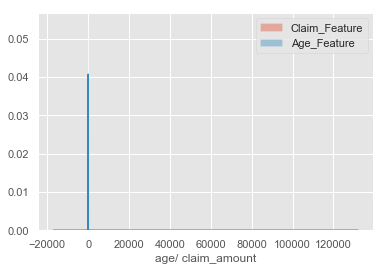

In [17]:
#Visualizing the data - displot
plot_income = sns.distplot(df["total_claim_amount"],label="Claim_Feature")
plot_spend = sns.distplot(df["age"],label="Age_Feature")
plt.xlabel('age/ claim_amount')
plt.legend();

[(0, 300)]

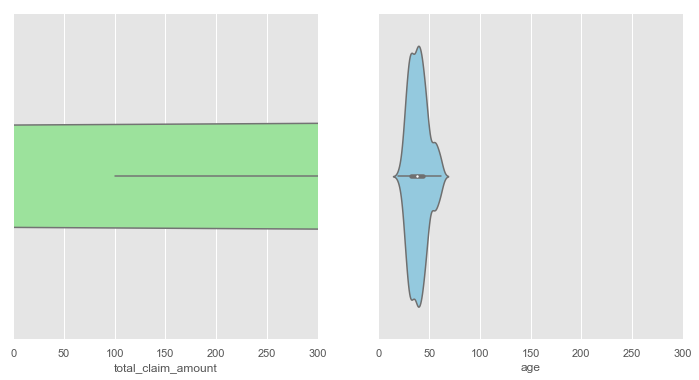

In [18]:
#Violin plot of Income and Spend
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=df, x='total_claim_amount',color="lightgreen", ax=axes[0])
v2 = sns.violinplot(data=df, x='age', color="skyblue",ax=axes[1])
v1.set(xlim=(0,300))

In [19]:
from sklearn.cluster import KMeans

### For the purposes of this example, we store feature data from our
### dataframe `df`, in the `f1` and `f2` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.
f1 = df['total_claim_amount'].values
f2 = df['age'].values

X=np.matrix(list(zip(f1,f2))) #NB had to add list in front of this as in Python3 zip returns an iterator that needs a further conversion ?
# see also https://stackoverflow.com/questions/40282290/float-argument-must-be-a-string-or-a-number-not-zip
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

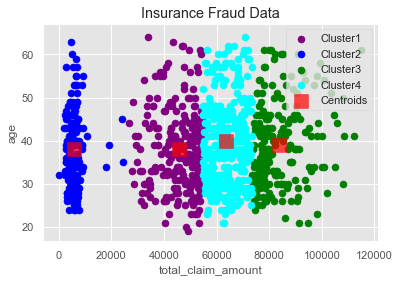

In [21]:
#Visualizing the clusters for k=4
plt.scatter([X[y_means==0,0]],[X[y_means==0,1]],s=50, c='purple',label='Cluster1')
plt.scatter([X[y_means==1,0]],[X[y_means==1,1]],s=50, c='blue',label='Cluster2')
plt.scatter([X[y_means==2,0]],[X[y_means==2,1]],s=50, c='green',label='Cluster3')
plt.scatter([X[y_means==3,0]],[X[y_means==3,1]],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Insurance Fraud Data')
plt.xlabel('total_claim_amount')
plt.ylabel('age')
plt.legend()
plt.show()

# Lets check 

In [22]:
df1 = pd.DataFrame(data, columns = ["policy_number","insured_sex","age","total_claim_amount"])
df1.head()

,policy_number,insured_sex,age,total_claim_amount
0,521585,MALE,48,71610
1,342868,MALE,42,5070
2,687698,FEMALE,29,34650
3,227811,FEMALE,41,63400
4,367455,MALE,44,6500


In [23]:
df1.groupby("insured_sex").size()

insured_sex
FEMALE    537
MALE      463
dtype: int64

In [ ]:
#categorical1 = df1[df1.columns[df1.dtypes==object]]
#categorical1.describe()

In [ ]:
#one hot encoding(will be one colum)
# converting categorical data to numerical by using dummies
#cat_dummies1 = pd.get_dummies(categorical1, categorical1.columns, drop_first = False)
#cat_dummies1.head() # display 5 rows

In [27]:
df1['insured_sex'] = (df1['insured_sex'] == "MALE") * 1.0

In [28]:
df1.head()

,policy_number,insured_sex,age,total_claim_amount
0,521585,1.0,48,71610
1,342868,1.0,42,5070
2,687698,0.0,29,34650
3,227811,0.0,41,63400
4,367455,1.0,44,6500


In [70]:
from sklearn.cluster import KMeans

### For the purposes of this example, we store feature data from our
### dataframe `df`, in the `f1` and `f2` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.
f1 = df1['total_claim_amount'].values
f2 = df1['age'].values


X=np.matrix(list(zip(f1,f2))) #NB had to add list in front of this as in Python3 zip returns an iterator that needs a further conversion ?
# see also https://stackoverflow.com/questions/40282290/float-argument-must-be-a-string-or-a-number-not-zip
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
##Fitting kmeans to the dataset with k=4
km5=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km5.fit_predict(X)

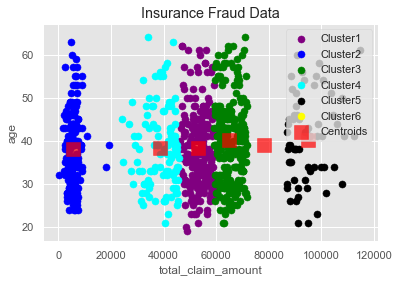

In [72]:
#Visualizing the clusters for k=6
plt.scatter([X[y_means==1,0]],[X[y_means==1,1]],s=50, c='purple',label='Cluster1')
plt.scatter([X[y_means==2,0]],[X[y_means==2,1]],s=50, c='blue',label='Cluster2')
plt.scatter([X[y_means==3,0]],[X[y_means==3,1]],s=50, c='green',label='Cluster3')
plt.scatter([X[y_means==4,0]],[X[y_means==4,1]],s=50, c='cyan',label='Cluster4')
plt.scatter([X[y_means==5,0]],[X[y_means==5,1]],s=50, c='black',label='Cluster5')
plt.scatter([X[y_means==6,0]],[X[y_means==6,1]],s=50, c='yellow',label='Cluster6')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Insurance Fraud Data')
plt.xlabel('total_claim_amount')
plt.ylabel('age')
plt.legend()
plt.show()

In [73]:
# Prediction for Test Data Set
predict = km5.predict(X)
predict

array([3, 2, 4, 3, 2, 3, 0, 1, 4, 4, 5, 5, 1, 2, 1, 3, 1, 0, 0, 3, 1, 4,
       3, 5, 0, 3, 2, 2, 3, 5, 0, 3, 4, 0, 3, 1, 3, 2, 3, 3, 4, 5, 1, 1,
       1, 1, 0, 3, 2, 0, 0, 2, 2, 3, 2, 0, 1, 2, 3, 3, 3, 4, 1, 3, 1, 0,
       5, 4, 3, 2, 3, 3, 4, 1, 4, 1, 5, 3, 2, 0, 1, 2, 2, 2, 3, 1, 3, 3,
       2, 4, 3, 5, 2, 3, 5, 2, 0, 3, 2, 2, 0, 1, 4, 2, 5, 2, 0, 0, 3, 3,
       0, 3, 0, 1, 2, 1, 1, 3, 5, 0, 3, 0, 1, 0, 4, 4, 4, 2, 3, 4, 0, 3,
       1, 1, 0, 3, 2, 3, 0, 0, 1, 2, 2, 3, 4, 5, 3, 1, 0, 5, 0, 1, 3, 3,
       1, 4, 0, 2, 0, 2, 2, 0, 0, 5, 5, 3, 3, 3, 2, 2, 1, 1, 4, 1, 2, 0,
       0, 3, 0, 2, 1, 5, 5, 0, 1, 5, 2, 2, 0, 5, 2, 1, 1, 2, 4, 1, 2, 2,
       3, 2, 2, 0, 2, 3, 2, 1, 3, 0, 3, 2, 2, 2, 4, 1, 0, 0, 3, 2, 3, 3,
       3, 4, 1, 1, 0, 0, 5, 1, 1, 0, 1, 4, 3, 0, 1, 0, 4, 0, 3, 4, 1, 0,
       2, 3, 2, 0, 1, 5, 2, 3, 1, 0, 2, 1, 3, 1, 1, 1, 2, 1, 2, 1, 3, 3,
       1, 2, 1, 0, 4, 3, 0, 2, 0, 3, 3, 4, 3, 3, 3, 3, 1, 2, 2, 3, 0, 3,
       3, 2, 3, 2, 5, 1, 1, 5, 1, 0, 0, 2, 2, 3, 2,

In [74]:
# Creating Data Frame for prediction
pred  = pd.DataFrame(predict)

In [75]:
pred.head()

,0
0,3
1,2
2,4
3,3
4,2


In [76]:
# Prediction columns name came as "0"
# Lets rename to 'PROSPECTIVE_DONOR' 
pred.rename(columns = {0: 'Cluster'}, inplace = True)

In [77]:
#Mergeing Prediction with Test dataset
Cluster_Group = pd.merge(df1.policy_number , pred, how = 'left',left_index = True, right_index = True)
Cluster_Group.head() # show 5 rows

,policy_number,Cluster
0,521585,3
1,342868,2
2,687698,4
3,227811,3
4,367455,2


In [78]:
Cluster_Group.groupby("Cluster").size()

Cluster
0    170
1    228
2    180
3    246
4    114
5     62
dtype: int64

In [79]:
Cluster_Group["Cluster"].unique()

array([3, 2, 4, 0, 1, 5], dtype=int64)